In [2]:
# UNSUPERVISED dataset 
# Step 1: Load the Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('Areayan.csv')

# Display the first few rows of the dataset
df.head()



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
# Step 2: Preprocess the Data
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()

# Select numeric columns for normalization
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize the data
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the first few rows of the processed dataset
df.head()


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,-0.257951,-0.324102,0.792748,0.478964,0.591157,1.309107,0.0,0.102152,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,-0.270141,-0.339134,0.639470,0.499902,0.665655,1.309107,0.0,0.106415,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,-0.267819,-0.138532,0.792748,-0.993620,0.153478,1.100806,0.0,0.109058,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,-0.381594,-0.458873,0.486192,0.476638,0.758778,1.309107,0.0,0.113066,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,-0.332833,-0.362460,0.486192,0.034630,0.665655,1.309107,0.0,0.113919,Partly cloudy throughout the day.


In [4]:
# Step 3: Apply K-means Clustering
from sklearn.cluster import KMeans

# Choose the number of clusters
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed

# Fit the model and predict the clusters
clusters = kmeans.fit_predict(df[numeric_cols])

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Display the first few rows of the dataframe with cluster labels
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Cluster
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,-0.257951,-0.324102,0.792748,0.478964,0.591157,1.309107,0.0,0.102152,Partly cloudy throughout the day.,1
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,-0.270141,-0.339134,0.639470,0.499902,0.665655,1.309107,0.0,0.106415,Partly cloudy throughout the day.,1
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,-0.267819,-0.138532,0.792748,-0.993620,0.153478,1.100806,0.0,0.109058,Partly cloudy throughout the day.,1
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,-0.381594,-0.458873,0.486192,0.476638,0.758778,1.309107,0.0,0.113066,Partly cloudy throughout the day.,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,-0.332833,-0.362460,0.486192,0.034630,0.665655,1.309107,0.0,0.113919,Partly cloudy throughout the day.,1


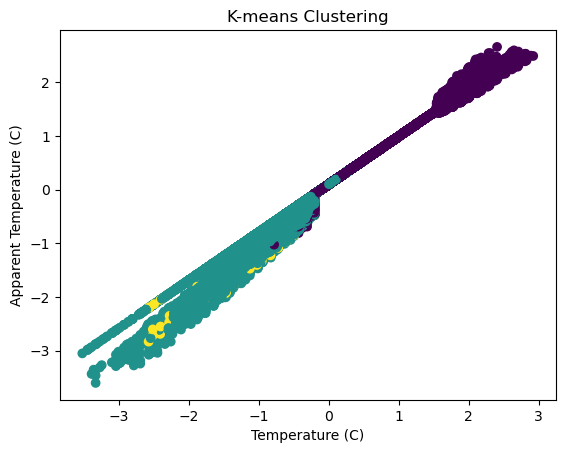

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,0.773982,0.782952,-0.591688,0.015230,0.032224,0.493376,0.0,0.103705
1,-0.809004,-0.817521,0.621896,-0.023856,-0.035389,-0.500827,0.0,0.129732
2,-0.129060,-0.161342,-0.024456,0.281961,0.055793,-0.615474,0.0,-8.553727


In [5]:
# Step 4: Analyze the Clusters
import matplotlib.pyplot as plt

# Visualize the clusters (using the first two features for simplicity)
plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.show()

# Inspect cluster characteristics
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numeric_cols)
cluster_centers


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Areayan.csv')

# Display the first few rows of the dataset
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
